In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from ast import literal_eval
from typing import Optional

data = Path("../data")
plot_path = data / "plots"

## Character traits

In [2]:
dfChar = pd.read_csv(data / "Anime_Traits.csv")
dfChar

Id            Names   Hair_Color  Gender  \
0            0                L   Black Hair    Male   
1            1   Kakashi HATAKE    Grey Hair    Male   
2            2     Edward ELRIC  Blonde Hair    Male   
3            3             Levi   Black Hair    Male   
4            4     Light YAGAMI   Brown Hair    Male   
...        ...              ...          ...     ...   
119820  123369         Narrator          NaN    Male   
119821  123370              Aoi  Purple Hair  Female   
119822  123371           Kiriko   Black Hair  Female   
119823  123372  Ryouta MINAMINO  Blonde Hair    Male   
119824  123373  Haruko HIRIKOMA          NaN  Female   

                                                     Tags  \
0       ['Analytical', 'Barefoot', 'Detective', 'Eye B...   
1       ['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...   
2       ['Alchemist', 'Arm Blades', 'Artificial Limb',...   
3       ['Adult', 'Military', 'Ruthless', 'Stoic', 'Sw...   
4       ['Analytical', 'Big Ego', 'Charismatic', 'God ...   
...                                                   ...   
119820                   ['Gold Lightan: Golden Warrior']   
119821                         ['Editor', 'Hair Antenna']   
119822              ['Eye Patch', 'Robot', 'Rosy Cheeks']   
119823       ['Anti-Gravity Hair', 'Glasses', 'Headband']   
119824             ['Helter Skelter: Fashion Unfriendly']   

                                                    Anime  \
0       ['Death Note', 'Death Note Rewrite 1: Visions ...   
1       ['Boruto: Naruto Next Generations', 'Boruto: N...   
2       ['Fullmetal Alchemist', 'Fullmetal Alchemist: ...   
3       ['Attack on Skytree', 'Attack on Titan', 'Atta...   
4       ['Death Note', 'Death Note Rewrite 1: Visions ...   
...                                                   ...   
119820                                                NaN   
119821                                 ['Kemeko Deluxe!']   
119822                                 ['Kemeko Deluxe!']   
119823                                 ['Kemeko Deluxe!']   
119824                                                NaN   

                                                    Manga  
0       ['Death Note', 'Death Note: L Change the World...  
1       ['Boruto: Naruto the Movie Tokubetsu Bangai-he...  
2       ['Fullmetal Alchemist', 'Fullmetal Alchemist G...  
3       ['Attack on Titan', 'Attack on Titan: Junior H...  
4                                          ['Death Note']  
...                                                   ...  
119820                                                NaN  
119821                                     ['Kemeko DX!']  
119822                                     ['Kemeko DX!']  
119823                                     ['Kemeko DX!']  
119824                                                NaN  

[119825 rows x 7 columns]

In [3]:
dfChar["Id"].nunique()

119824

In [4]:
dfChar["Gender"].value_counts()

Male                                          62063
Female                                        51143
Female General and Eldest Princess (Novel)        2
Return of the Female Knight (Novel)               1
I Met the Male Lead in Prison (Promo)             1
My Raw Love Life with a Male Demon                1
110115                                            1
Name: Gender, dtype: int64

In [5]:
dfGender = dfChar[["Gender","Names"]].groupby("Gender").count().reset_index()

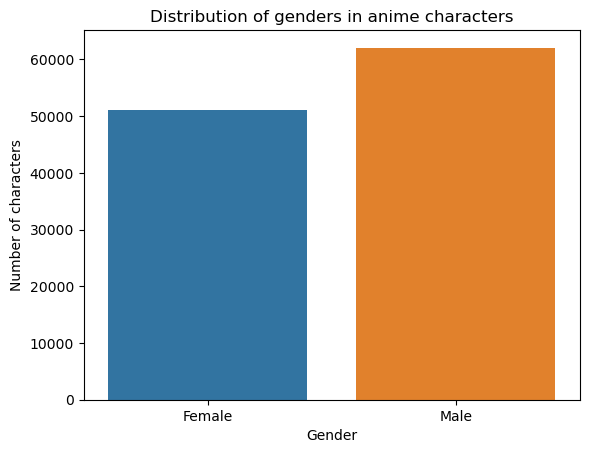

In [6]:
plot = sns.barplot(data = dfGender[dfGender["Names"] > 10], x = "Gender", y= "Names")
plt.title("Distribution of genders in anime characters")
plt.ylabel("Number of characters")

plot.figure.set_facecolor("white")
plot.get_figure().savefig(plot_path / "anime_characters_genders.png")

In [7]:
dfChar = dfChar[["Names","Tags"]]
dfChar.dropna(inplace=True)

/var/folders/hj/mdtvx8bj18q5bx1p7hng_wcc0000gn/T/ipykernel_40218/3572015977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChar.dropna(inplace=True)


In [8]:
def safe_literal_eval(node) -> Optional[str]:
     try:
         return literal_eval(node)
     except ValueError:
         return None

In [9]:
dfTag = dfChar.copy()
dfTag["Tags"] = dfTag["Tags"].apply(safe_literal_eval)
dfTag = dfTag.explode("Tags")

In [10]:
dfTag.head(5)

Names         Tags
0     L   Analytical
0     L     Barefoot
0     L    Detective
0     L     Eye Bags
0     L  Sweet Tooth

In [11]:
dfTag = dfTag.groupby('Tags').count()
dfTag.reset_index(inplace=True)
dfTag = dfTag.rename(columns={"Names" : "Count"})
dfTag.head(5)

Tags  Count
0  "Anata wo Hitokoto de Arawashite Kudasai" no S...      2
1         "Aoi" - Hikaru ga Chikyuu ni Itakoro......      4
2          "Bungaku Shoujo" Kyou no Oyatsu: Hatsukoi      2
3                           "Bungaku Shoujo" Memoire      6
4                             "Bungaku Shoujo" Movie      4

In [12]:
test = dfTag[dfTag["Count"] > 2000]
test.sort_values(by=['Count'], ascending=False,inplace=True)
test = test[(test["Tags"] != "Ponytail") & (test["Tags"] != "Hat") & (test["Tags"] != "Pointy Ears") & (test["Tags"] != "Hair Ribbons") & (test["Tags"] != "Hair Antenna") & (test["Tags"] != "Headband") & (test["Tags"] != "Pigtails")]
test.head(10)

/var/folders/hj/mdtvx8bj18q5bx1p7hng_wcc0000gn/T/ipykernel_40218/1284519556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.sort_values(by=['Count'], ascending=False,inplace=True)


Tags  Count
252                 Adult  22405
7713             Teenager  19875
3315  High School Student  12919
2854              Glasses   8992
2319          Facial Hair   8807
4758           Magic User   5559
7559        Sword Fighter   3920
1347                Child   3800
658               Athlete   3772
5068             Military   3643

In [13]:
test.shape

(22, 2)

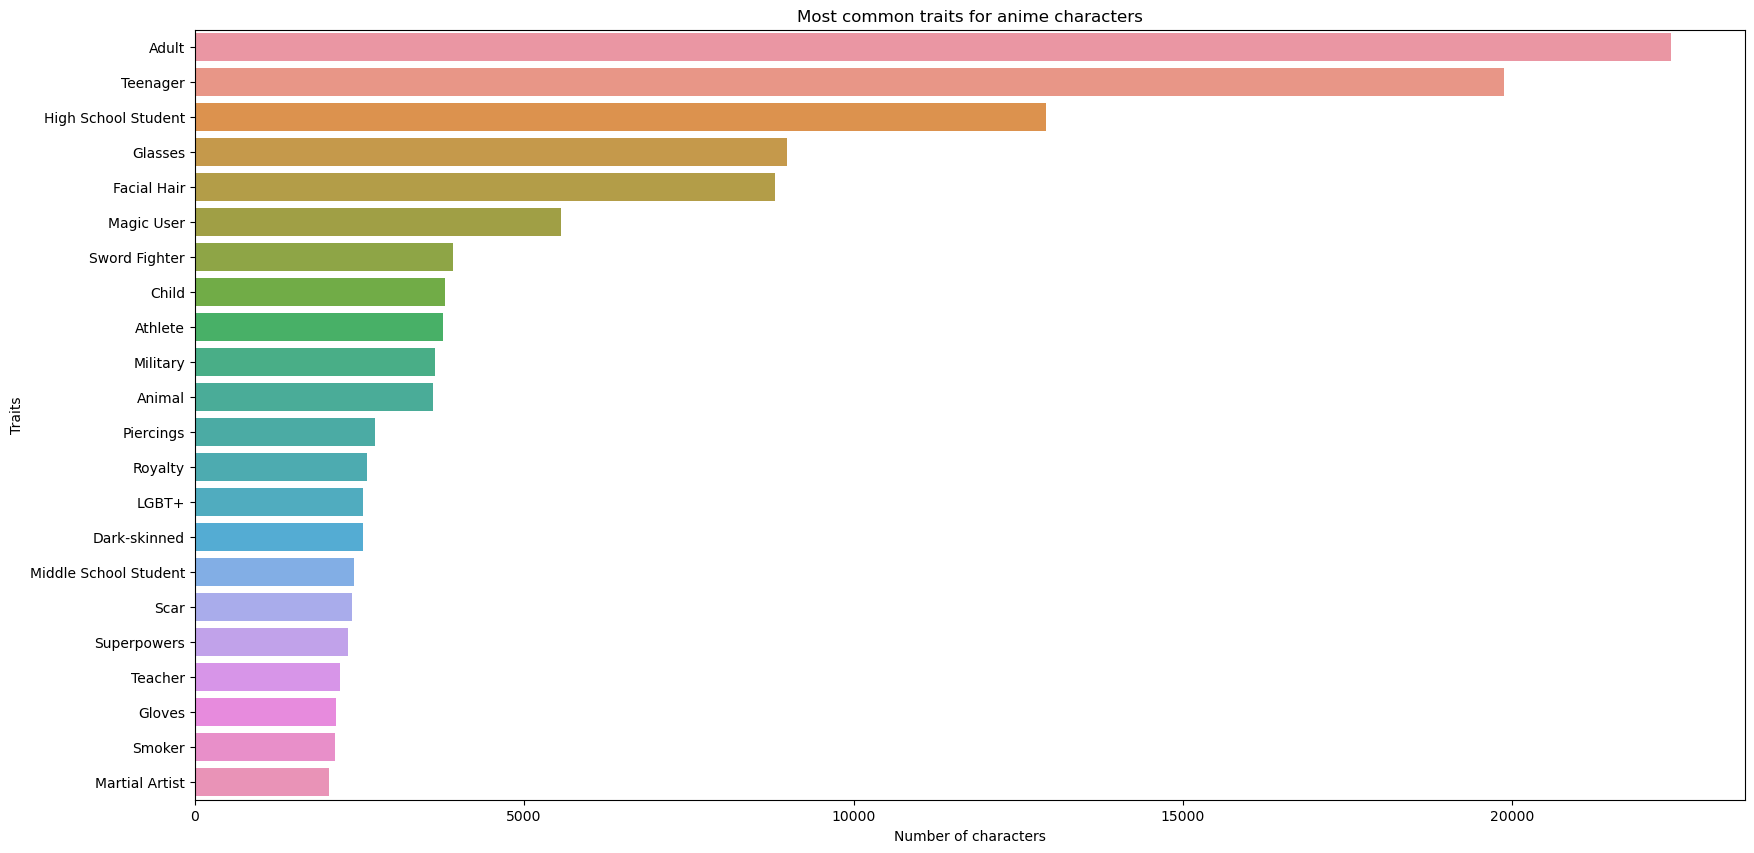

In [14]:
plt.figure(figsize=(20,10))
plot = sns.barplot(data = test, y = "Tags", x = "Count")
plt.title("Most common traits for anime characters")
plt.xlabel("Number of characters")
plt.ylabel("Traits")


# Set the background color to white
plot.figure.set_facecolor('white')
plt.show()

plot.get_figure().savefig(plot_path / "anime_characters_traits.png")

In [15]:
dfTag = dfTag[dfTag["Count"] > 500]
dfTag.sort_values(by=['Count'], ascending=False,inplace=True)
dfTag = dfTag[(dfTag["Tags"] != "Ponytail") & (dfTag["Tags"] != "Hat") & (dfTag["Tags"] != "Pointy Ears") & (dfTag["Tags"] != "Hair Ribbons") & (dfTag["Tags"] != "Hair Antenna") & (dfTag["Tags"] != "Headband") & (dfTag["Tags"] != "Pigtails")]
dfTag.head(10)

Tags  Count
252                 Adult  22405
7713             Teenager  19875
3315  High School Student  12919
2854              Glasses   8992
2319          Facial Hair   8807
4758           Magic User   5559
7559        Sword Fighter   3920
1347                Child   3800
658               Athlete   3772
5068             Military   3643

In [16]:
dfChar.head(5)

Names                                               Tags
0               L  ['Analytical', 'Barefoot', 'Detective', 'Eye B...
1  Kakashi HATAKE  ['Adult', 'Anti-Gravity Hair', 'Beastmaster', ...
2    Edward ELRIC  ['Alchemist', 'Arm Blades', 'Artificial Limb',...
3            Levi  ['Adult', 'Military', 'Ruthless', 'Stoic', 'Sw...
4    Light YAGAMI  ['Analytical', 'Big Ego', 'Charismatic', 'God ...

In [17]:
dfChar["Tags"] = dfChar["Tags"].apply(safe_literal_eval)

/var/folders/hj/mdtvx8bj18q5bx1p7hng_wcc0000gn/T/ipykernel_40218/1748424573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChar["Tags"] = dfChar["Tags"].apply(safe_literal_eval)


In [18]:
print(dfChar.iloc[0, 1])

['Analytical', 'Barefoot', 'Detective', 'Eye Bags', 'Sweet Tooth']


In [19]:
dfChar.head(5)

Names                                               Tags
0               L  [Analytical, Barefoot, Detective, Eye Bags, Sw...
1  Kakashi HATAKE  [Adult, Anti-Gravity Hair, Beastmaster, Exotic...
2    Edward ELRIC  [Alchemist, Arm Blades, Artificial Limb, Braid...
3            Levi  [Adult, Military, Ruthless, Stoic, Sword Fighter]
4    Light YAGAMI  [Analytical, Big Ego, Charismatic, God Complex...

In [20]:
temp = set(dfTag["Tags"].tolist())

In [21]:
print(temp)

{'Foreigner', 'Monster Tamer', 'Dark-skinned', 'Ninja', 'Smoker', 'Tattoo', 'Exotic Eyes', 'Elemental Powers', 'Gunslinger', 'Mecha Pilot', 'Choker', 'Elementary School Student', 'Robot', 'Sickly', 'Magnificent Mustache', 'Part Time Employee', 'Helmet', 'Shapeshifter', 'Closed Eyes', 'Musician', 'Bandana', 'Demon', 'Eye Patch', 'Nobility', 'Goggles', 'Sword Fighter', 'Breathtaking Beard', 'Superpowers', 'Horns', 'Warrior', 'Teenager', 'Artificial Intelligence (AI)', 'Police', 'Scientist', 'Immortal', 'Actor', 'Mole', 'Cook', 'Scarf', 'Student Council', 'Youkai', 'Android', 'Orphan', 'Bald', 'Rapunzel Hair', 'Assassin', 'Martial Artist', 'Overweight', 'Face Markings', 'Adult', 'Wealthy', 'Animal Ears', 'Pervert', 'Stoic', 'Snaggletooth', 'Soccer Player', 'LGBT+', 'Piercings', 'Magic User', 'Teacher', 'Historical Figure', 'Royalty', 'Twin', 'Merchant', 'Deity', 'Fire Powers', 'Writer', 'Cat', 'Elderly', 'Analytical', 'Middle School Student', 'Idol', 'Knight', 'High School Student', 'Band

In [22]:
dfChar["Tags"] = dfChar["Tags"].dropna()
dfChar = dfChar[pd.notnull(dfChar['Tags'])]


/var/folders/hj/mdtvx8bj18q5bx1p7hng_wcc0000gn/T/ipykernel_40218/1825170225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfChar["Tags"] = dfChar["Tags"].dropna()


In [23]:
for value in dfChar['Tags']:
    if isinstance(value, float):
        print(value)

In [24]:
dfChar["Tags"] = dfChar["Tags"].apply(lambda x: set(x))


In [25]:
dfChar["Tags"] = dfChar["Tags"].apply(lambda x: x.intersection(temp))

In [26]:
dfChar.head(5)

Names                                               Tags
0               L                            {Detective, Analytical}
1  Kakashi HATAKE   {Gloves, Masks, Exotic Eyes, Ninja, Scar, Adult}
2    Edward ELRIC   {Military, Braids, Hot-Headed, Teenager, Gloves}
3            Levi  {Sword Fighter, Ruthless, Stoic, Military, Adult}
4    Light YAGAMI      {Ruthless, Manipulative, Big Ego, Analytical}

In [27]:
dfChar = dfChar[dfChar["Tags"].apply(lambda x: len(x) > 0)]

In [28]:
dfChar.head(5)

Names                                               Tags
0               L                            {Detective, Analytical}
1  Kakashi HATAKE   {Gloves, Masks, Exotic Eyes, Ninja, Scar, Adult}
2    Edward ELRIC   {Military, Braids, Hot-Headed, Teenager, Gloves}
3            Levi  {Sword Fighter, Ruthless, Stoic, Military, Adult}
4    Light YAGAMI      {Ruthless, Manipulative, Big Ego, Analytical}

In [29]:
dfTemp = dfChar.copy()
# Select the tags for which you want to find the closest character
selected_tags = {"Teenager","Braids","Gloves","Military"}

def calculate_similarity(tags):
    intersection = set(tags).intersection(selected_tags)
    similarity = len(intersection) / (len(tags) + len(selected_tags) - len(intersection))
    return similarity

dfTemp['Similarity'] = dfTemp['Tags'].apply(calculate_similarity)

# Find the closest character
closest_character = dfTemp.loc[dfTemp['Similarity'].idxmax(), 'Names']
print('Closest character:', closest_character)

Closest character: Edward ELRIC


In [186]:
!pip install fuzzywuzzy

In [187]:
from fuzzywuzzy import fuzz

/Users/babooke/opt/miniconda3/envs/ada/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [194]:
dfTemp = dfChar.copy()

# Input name for similarity comparison
input_name = 'LightYagam'

# Calculate the Levenshtein distance between input name and each name in the dataframe
dfTemp['Distance'] = dfTemp['Names'].apply(lambda name: fuzz.ratio(name.lower(), input_name.lower()))

# Find the closest name
closest_name = dfTemp.loc[dfTemp['Distance'].idxmax(), 'Names']

# Print the closest name
print('Closest name:', closest_name)

Closest name: Light YAGAMI


In [33]:
import json

In [30]:
dfChar["Tags"] = dfChar["Tags"].apply(lambda x : list(x))

In [31]:
dfTag = dfTag.rename(columns={"Count" : "value", "Tags" : "text"})
dfChar = dfChar.rename(columns={"Names" : "text", "Tags" : "value"})

In [34]:
# Assuming you have data frames dfChar and dfTag

# Create a dictionary to hold the JSON structure
json_data = {}

# Convert dfChar to JSON
json_data['dfChar'] = dfChar.to_dict(orient='records')

# Convert dfTag to JSON
json_data['dfTag'] = dfTag.to_dict(orient='records')

# Convert the JSON data to a JSON string
json_string = json.dumps(json_data)

# Print the JSON string
print(json_string)

{"dfChar": [{"text": "L", "value": ["Detective", "Analytical"]}, {"text": "Kakashi HATAKE", "value": ["Gloves", "Masks", "Exotic Eyes", "Ninja", "Scar", "Adult"]}, {"text": "Edward ELRIC", "value": ["Military", "Braids", "Hot-Headed", "Teenager", "Gloves"]}, {"text": "Levi", "value": ["Sword Fighter", "Ruthless", "Stoic", "Military", "Adult"]}, {"text": "Light YAGAMI", "value": ["Ruthless", "Manipulative", "Big Ego", "Analytical"]}, {"text": "Naruto UZUMAKI", "value": ["Face Markings", "Hot-Headed", "Ninja", "Orphan"]}, {"text": "Mikasa ACKERMAN", "value": ["Sword Fighter", "Stoic", "Scarf", "Military", "Orphan"]}, {"text": "Itachi UCHIHA", "value": ["Stoic", "Exotic Eyes", "Ninja"]}, {"text": "Ryuk", "value": ["Immortal", "Wings", "Piercings"]}, {"text": "Lelouch LAMPEROUGE", "value": ["Ruthless", "Psychic Powers", "Manipulative", "Big Ego", "Exotic Eyes", "Masks", "Student Council", "Mecha Pilot", "Analytical", "Royalty", "Superpowers", "High School Student", "Teenager", "Cape"]}, {"

In [ ]:
with open("char.json", 'w') as file:
    json.dump(json_data, file)